In [42]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [43]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


# Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [44]:
x=df[['make','transmission','state','condition','odometer','auction_value']]
y=df[['selling_price']]

# Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [45]:
df.isnull().sum()

make             891
transmission     949
state            903
condition        882
odometer         877
auction_value    948
selling_price      0
dtype: int64

In [54]:
df['condition'].fillna(df['condition'].median(),inplace=True)
df['odometer'].fillna(df['odometer'].median(),inplace=True)
df['auction_value'].fillna(df['auction_value'].median(),inplace=True)
df.isnull().sum()

make             891
transmission     949
state            903
condition          0
odometer           0
auction_value      0
selling_price      0
dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
data=df[['condition','odometer','auction_value','selling_price']]

data_scale=data.copy()
data_scale.fillna(0,inplace=True)

sc=StandardScaler()
data1=sc.fit_transform(data_scale)
data1

array([[ 1.33305878, -0.18533584, -0.19118532, -0.28259296],
       [-0.08100654, -0.41098549,  0.2490203 ,  0.15990885],
       [-0.72376351, -0.31410936,  0.45219212,  0.2231234 ],
       ...,
       [ 1.20450738, -1.27621957, -0.44176391, -0.25730714],
       [ 1.07595599, -0.28158517,  0.81790141,  1.41155684],
       [-0.08100654, -0.60675746,  1.76603659,  1.76555829]])

# Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.

In [60]:
df['make'].fillna(df['transmission'].mode(),inplace=True)
df['transmission'].fillna(df['transmission'].mode(),inplace=True)
df['state'].fillna(df['state'].mode(),inplace=True)

In [79]:
dummies1=pd.get_dummies(df,columns=['make','transmission','state'])
dummies1_scale=data.copy()
dummies1_scale.fillna(0,inplace=True)

sc1=StandardScaler()
data2=sc1.fit_transform(dummies1_scale)
data2

array([[ 1.33305878, -0.18533584, -0.19118532, -0.28259296],
       [-0.08100654, -0.41098549,  0.2490203 ,  0.15990885],
       [-0.72376351, -0.31410936,  0.45219212,  0.2231234 ],
       ...,
       [ 1.20450738, -1.27621957, -0.44176391, -0.25730714],
       [ 1.07595599, -0.28158517,  0.81790141,  1.41155684],
       [-0.08100654, -0.60675746,  1.76603659,  1.76555829]])

# Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.

In [82]:
df2 = data1+data2
df2

array([[ 2.66611755, -0.37067169, -0.38237065, -0.56518592],
       [-0.16201309, -0.82197098,  0.4980406 ,  0.31981771],
       [-1.44752701, -0.62821872,  0.90438425,  0.4462468 ],
       ...,
       [ 2.40901477, -2.55243914, -0.88352782, -0.51461429],
       [ 2.15191198, -0.56317034,  1.63580282,  2.82311368],
       [-0.16201309, -1.21351491,  3.53207319,  3.53111659]])

# Question 5: Add a linear regression model to the pipeline.

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=.25,random_state=10)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [88]:
print(reg.coef_)
print(reg.intercept_)

[[ 3.51793949e-12 -2.27373675e-12 -2.27373675e-13  3.95478605e+03]]
[15835.18939812]


# Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?

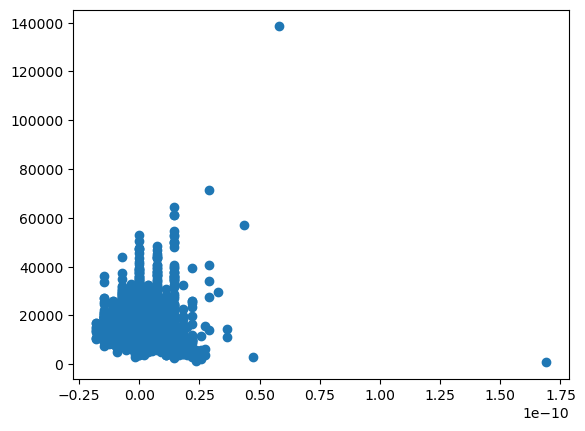

In [98]:
import matplotlib.pyplot as plt
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)

plt.show()

# Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the 
R
2
?

In [108]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=100))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100))])